# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [38]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-03-23 20:31:38--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2021-03-23 20:31:38 (4.82 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,770,80,44,68,120,53,8,151,45,19,146,170,333,190,80,4,16,180,185
1,825,86,39,84,149,57,8,156,43,20,133,185,358,157,74,0,23,183,190
2,352,91,46,78,148,61,9,147,45,19,152,168,323,199,70,13,11,189,200
3,714,94,44,70,186,72,8,153,42,19,144,171,361,178,67,7,2,199,206
4,811,83,39,69,127,54,5,135,49,18,131,155,274,162,69,16,6,187,190
5,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191
6,105,108,53,103,202,64,10,220,30,25,168,224,711,214,73,11,10,188,199
7,771,97,48,105,212,64,11,201,33,23,155,212,602,162,64,2,7,193,202
8,178,93,37,73,174,68,7,151,43,19,131,175,347,135,68,1,22,196,205
9,219,85,39,57,126,56,6,114,58,17,135,134,195,145,64,17,7,197,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.775956,93.688525,44.530055,81.888889,168.816029,61.595628,8.551913,167.774135,41.100182,20.497268,147.225865,187.653916,433.959927,173.293260,71.912568,6.449909,12.497268,189.373406,196.132969
std,241.569048,8.111195,6.089172,15.618526,32.572559,7.556144,4.590885,32.334982,7.668959,2.528396,14.336034,30.503627,171.213195,32.239234,7.273565,4.925702,8.972306,6.234829,7.459048
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,231.000000,88.000000,39.000000,70.000000,142.000000,57.000000,7.000000,146.000000,34.000000,19.000000,135.000000,167.000000,317.000000,148.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,424.000000,92.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,178.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,214.000000,575.000000,195.000000,75.000000,9.000000,19.000000,193.000000,202.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,264.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
# Here we perform some normalizing and centring of our our data. We normalize both test and train data
# Actually, we norm test data by train one, because we suppose that test data is unreachable for us at this moment, but not to forget about normolizing later

X_train_norm = (X_train - np.mean(X_train,axis = 0))/np.std(X_train,axis = 0) #centering and normilize train data
X_test_norm = (X_test - np.mean(X_train,axis = 0))/np.std(X_train,axis = 0) #centering and normilize test data



#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
model = LogisticRegressionCV(cv = 9,multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
# print(y_pred)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='micro'))

0.8047138047138047
0.8047138047138047


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [25]:
### Here we manage some PCA transformation. Our data is already normalized
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components = 15)
pca.fit(X_train_norm)
X_train_new = pca.transform(X_train_norm)
X_test_new = pca.transform(X_test_norm)
# pca.transform(X_train_norm)
# pca.transform(X_test_norm).shape

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [26]:
### YOUR CODE HERE

model.fit(X_train_new, y_train)
y_pred= model.predict(X_test_new)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='micro'))

0.8114478114478114
0.8114478114478115


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [84]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree = DecisionTreeClassifier(max_depth = 15)
tree.fit(X_train_norm, y_train)
y_pred = tree.predict(X_test_norm)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='micro'))

0.7104377104377104
0.7104377104377103


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [85]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

n_s = [i for i in range(2,100,5)]
log_bags = []
tree_bags = []
for n in n_s:
  log_bag = BaggingClassifier(base_estimator=model, n_estimators=2).fit(X_train_new, y_train)
  tree_bag = BaggingClassifier(base_estimator=tree, n_estimators=10).fit(X_train_new, y_train)
  # y_pred_log= log_bag.predict(X_test_new)
  # y_pred_tree = tree_bag.predict(X_test_new)
  # print(accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_tree))
  # print(f1_score(y_test, y_pred_log,average='micro'), f1_score(y_test, y_pred_tree,average='micro'))
  log_bags.append(log_bag)
  tree_bags.append(tree_bag)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

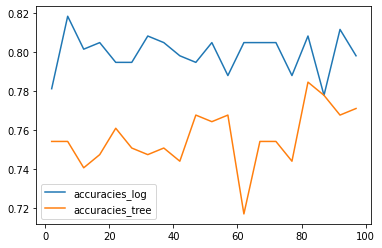

In [86]:
import matplotlib.pyplot as plt
accuracies_log = [accuracy_score(log_bags[i].predict(X_test_new), y_test) for i in range(20)]
accuracies_tree = [accuracy_score(tree_bags[i].predict(X_test_new), y_test) for i in range(20)]
f1_log = [f1_score(log_bags[i].predict(X_test_new), y_test,average='micro') for i in range(20)]
f1_tree = [f1_score(tree_bags[i].predict(X_test_new), y_test,average='micro') for i in range(20)]
plt.plot(n_s,accuracies_log, label="accuracies_log")
plt.plot(n_s, accuracies_tree, label="accuracies_tree")
# plt.plot(range(20),f1_log,label = "f1_log")
# plt.plot(range(20),f1_tree, label ="f1_tree")
plt.legend()

**Brief plot analys**$$$$
Brief plot analys shows, that DecissionTree bagging seems to be less accurate then LogRegression one. May be thats is possible to imporove Tree results by getting beter max_depth value. A number of models in one bagging that perform the good accuracy for both baggings is near 80.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [97]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
n_s = [i for i in range(1,550,5)]
rand_forests = [RandomForestClassifier(n).fit(X_train_new, y_train) for n in n_s]


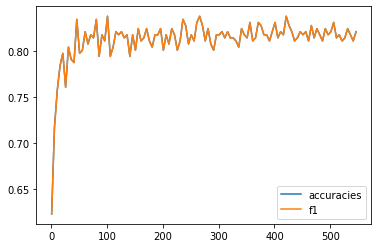

In [98]:
accuracies = [accuracy_score(rand_forests[i].predict(X_test_new), y_test) for i in range(len(n_s))]
f1 = [f1_score(rand_forests[i].predict(X_test_new), y_test,average='micro') for i in range(len(n_s))]
plt.plot(n_s,accuracies, label="accuracies")
plt.plot(n_s, f1, label="f1")
plt.legend()

The plot show us that from some number in area of 80 the accuracy of forests does not raise, and 80 is the same number from exercise 2.6

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE